### import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


### data reading

In [2]:

df = pd.read_csv('data.csv')


In [3]:
print(df.dtypes)


Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


### data cleaning

In [4]:

df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')


### data analyze

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


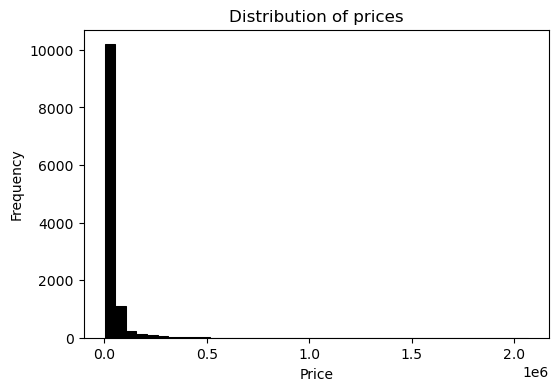

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


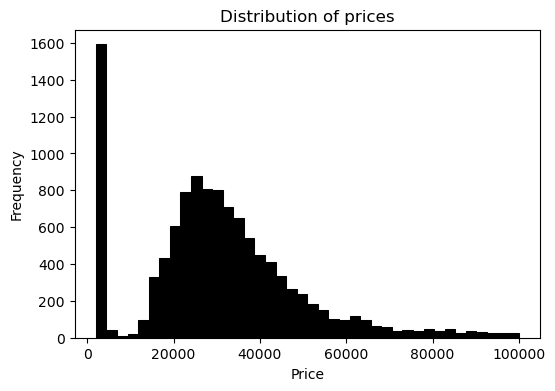

In [5]:

plt.figure(figsize=(6, 4))
sns.histplot(df.msrp, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df.msrp[df.msrp < 100000], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')
plt.show()


### Applying Log Transformation

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


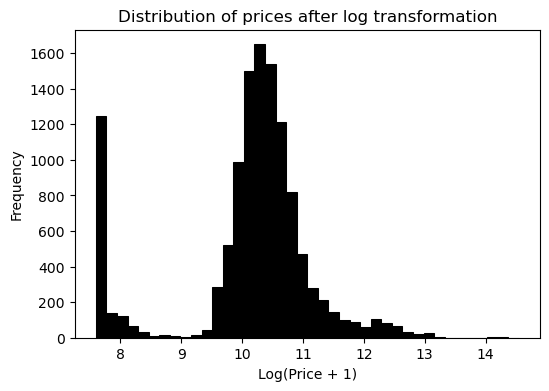

In [6]:

log_price = np.log1p(df.msrp)
plt.figure(figsize=(6, 4))
sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log transformation')
plt.show()


### split data into train and test

In [7]:

np.random.seed(2)
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']


### linear regression

In [8]:

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]



### version 1 prepare_x

In [9]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)


### Comparing Distributions Between Prediction and data Training

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


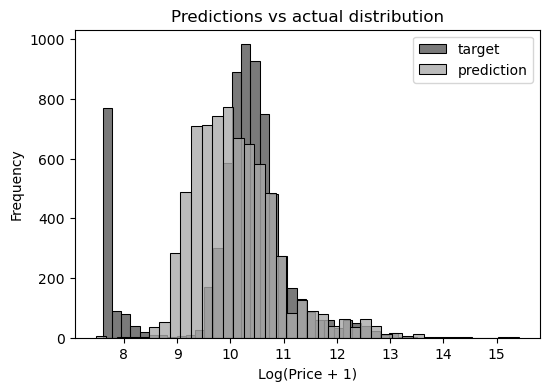

In [10]:
plt.figure(figsize=(6, 4))
sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')
plt.show()


### RMSE

In [11]:

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)


In [12]:
# x_train
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

# x_val
X_val = prepare_X(df_val)
y_pred_val = w_0 + X_val.dot(w)

# حساب RMSE
print("Train RMSE:", rmse(y_train, y_pred))
print("Validation RMSE:", rmse(y_val, y_pred_val))


Train RMSE: 0.7554192603920132
Validation RMSE: 0.7616530991301601


### Simple feature engineering


### Adding 'Age' as a Feature in the Data Preparation Function

### Version 2 of prepare_X:

+ Adding age as a feature


In [13]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [14]:
# x_train
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

# x_val
X_val = prepare_X(df_val)
y_pred_val = w_0 + X_val.dot(w)

# حساب RMSE
print("Train RMSE:", rmse(y_train, y_pred))
print("Validation RMSE:", rmse(y_val, y_pred_val))


Train RMSE: 0.5175055465840046
Validation RMSE: 0.5172055461058335


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


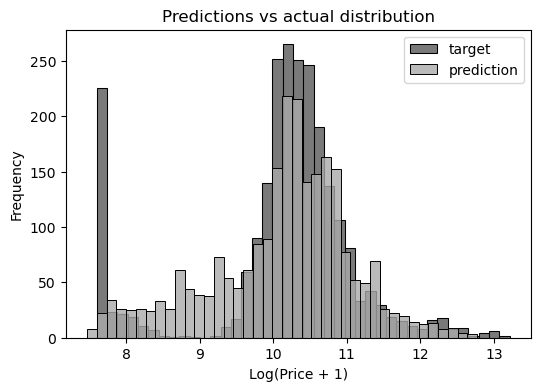

In [15]:
plt.figure(figsize=(6, 4))


sns.histplot(y_val, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_val, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

### 'make' feature

In [16]:
df['make'].value_counts()


make
chevrolet        1123
ford              881
volkswagen        809
toyota            746
dodge             626
nissan            558
gmc               515
honda             449
mazda             423
cadillac          397
mercedes-benz     353
suzuki            351
bmw               334
infiniti          330
audi              328
hyundai           303
volvo             281
subaru            256
acura             252
kia               231
mitsubishi        213
lexus             202
buick             196
chrysler          187
pontiac           186
lincoln           164
oldsmobile        150
land_rover        143
porsche           136
saab              111
aston_martin       93
plymouth           82
bentley            74
ferrari            69
fiat               62
scion              60
maserati           58
lamborghini        52
rolls-royce        31
lotus              29
tesla              18
hummer             17
maybach            16
alfa_romeo          5
mclaren             5
spyke

### number of doors

In [17]:
df['number_of_doors'].value_counts()

number_of_doors
4.0    8353
2.0    3160
3.0     395
Name: count, dtype: int64

### Version 3 of prepare_X:

+ Adding age as a feature
+ One-Hot Encoding for:
 + 1- number_of_doors to handle its categorical nature and avoid misinterpreted numerical relationships
 + 2- make 
 

In [18]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


In [19]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [20]:
print(df.dtypes)


make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object


In [21]:
# x_train
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

# x_val
X_val = prepare_X(df_val)
y_pred_val = w_0 + X_val.dot(w)

# RMSE
print("Train RMSE:", rmse(y_train, y_pred))
print("Validation RMSE:", rmse(y_val, y_pred_val))


Train RMSE: 0.5058876515487503
Validation RMSE: 0.5076038849557034


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


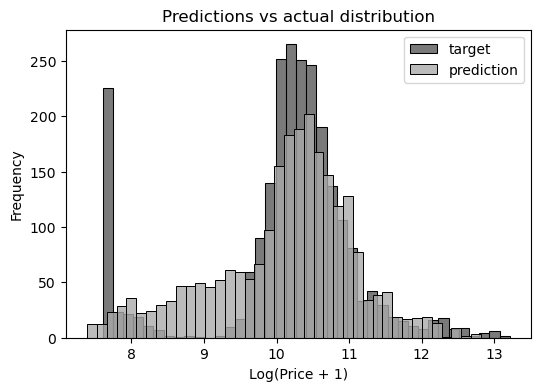

In [22]:
plt.figure(figsize=(6, 4))


sns.histplot(y_val, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_val, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

 ### Version 4 of prepare_X:

+ Adding age as a feature
+ One-Hot Encoding for:
 + 1- number_of_doors to handle its categorical nature and avoid misinterpreted numerical relationships
 + 2- make 
 + 3- engine_fuel_type 


In [23]:
df['engine_fuel_type'].value_counts()

engine_fuel_type
regular_unleaded                                7172
premium_unleaded_(required)                     2009
premium_unleaded_(recommended)                  1523
flex-fuel_(unleaded/e85)                         899
diesel                                           154
electric                                          66
flex-fuel_(premium_unleaded_required/e85)         54
flex-fuel_(premium_unleaded_recommended/e85)      26
flex-fuel_(unleaded/natural_gas)                   6
natural_gas                                        2
Name: count, dtype: int64

In [24]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [25]:
# x_train
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

# x_val
X_val = prepare_X(df_val)
y_pred_val = w_0 + X_val.dot(w)

# حساب RMSE
print("Train RMSE:", rmse(y_train, y_pred))
print("Validation RMSE:", rmse(y_val, y_pred_val))


Train RMSE: 0.4788482615078598
Validation RMSE: 0.4748256737227088


### Version 5 of prepare_X:

+ Adding age as a feature
+ One-Hot Encoding for:
 + 1- number_of_doors to handle its categorical nature and avoid misinterpreted numerical relationships
 + 2- make 
 + 3- engine_fuel_type 
 + 4- transmission_type 

In [26]:
df['transmission_type'].value_counts()


transmission_type
automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: count, dtype: int64

In [27]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [28]:
# x_train
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

# x_val
X_val = prepare_X(df_val)
y_pred_val = w_0 + X_val.dot(w)

# حساب RMSE
print("Train RMSE:", rmse(y_train, y_pred))
print("Validation RMSE:", rmse(y_val, y_pred_val))


Train RMSE: 0.4745380510924004
Validation RMSE: 0.4685879194659198


### Version 6 of prepare_X:

+ Adding age as a feature
+ One-Hot Encoding for:
 + 1- number_of_doors to handle its categorical nature and avoid misinterpreted numerical relationships
 + 2- make 
 + 3- engine_fuel_type 
 + 4- transmission_type 
 + 5-driven_wheels
 + 6- market_category
 + 7- vehicle_size
 + 8- vehicle_style

In [29]:
df['driven_wheels'].value_counts()


driven_wheels
front_wheel_drive    4787
rear_wheel_drive     3371
all_wheel_drive      2353
four_wheel_drive     1403
Name: count, dtype: int64

In [30]:
df['market_category'].value_counts().head(5)


market_category
crossover             1110
flex_fuel              872
luxury                 855
luxury,performance     673
hatchback              641
Name: count, dtype: int64

In [31]:
df['vehicle_size'].value_counts().head(5)


vehicle_size
compact    4764
midsize    4373
large      2777
Name: count, dtype: int64

In [32]:
df['vehicle_style'].value_counts().head(5)


vehicle_style
sedan            3048
4dr_suv          2488
coupe            1211
convertible       793
4dr_hatchback     702
Name: count, dtype: int64

In [33]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheens_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)

    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [34]:
# x_train
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

# x_val
X_val = prepare_X(df_val)
y_pred_val = w_0 + X_val.dot(w)

# حساب RMSE
print("Train RMSE:", rmse(y_train, y_pred))
print("Validation RMSE:", rmse(y_val, y_pred_val))


Train RMSE: 1607.4898641126447
Validation RMSE: 830.8920785817741


### another way to apply one hot encoding to categorical columns

In [35]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 
    'market_category', 'vehicle_size', 'vehicle_style'
]
categories = {}
 
for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [36]:
def prepare_X(df):
    # this is good way to do, otherwise while using df you'll modify the original data
    # what is mostly not wanted
    df = df.copy()
    features = base.copy()
     
    df['age'] = 2017 - df.year
    features.append('age')
     
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
 
    # First loop is for each key of the dictionary categories.
    # Second loop is for each value inside the categories
    # For each of this values we create a new column.
    for c, values in categories.items():    
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

In [37]:
# x_train
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

# x_val
X_val = prepare_X(df_val)
y_pred_val = w_0 + X_val.dot(w)

# حساب RMSE
print("Train RMSE:", rmse(y_train, y_pred))
print("Validation RMSE:", rmse(y_val, y_pred_val))


Train RMSE: 38.4806220727419
Validation RMSE: 23.370682839235876


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


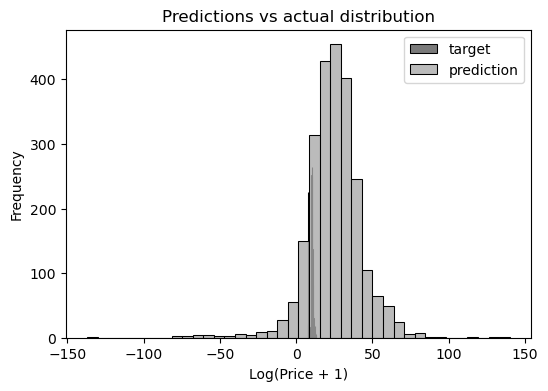

In [38]:
plt.figure(figsize=(6, 4))


sns.histplot(y_val, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_val, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [39]:
w_0

8076722330785280.0

In [40]:
w

array([ 2.19613378e-01, -1.23924815e+01, -1.55565980e-01,  1.72019346e+00,
       -7.48030012e-04,  8.57866963e-01,  1.10007186e+03,  1.10703242e+03,
        1.08970027e+03, -1.64182016e+00,  8.70500716e-01,  1.40383685e+00,
       -5.06840411e+00,  1.74186165e+00,  9.89781234e+01,  8.76598208e+01,
        9.34493805e+01,  9.43490986e+01,  1.07661838e+02, -6.54670381e+15,
       -6.54670381e+15, -6.54670381e+15, -6.54670381e+15, -6.54670381e+15,
       -1.53001852e+15, -1.53001852e+15, -1.53001852e+15, -1.53001852e+15,
        2.69409282e+00,  8.23531258e-01,  7.64925861e-01, -7.08728902e-02,
       -6.58368806e+00,  1.12149550e+01,  1.25863344e+01,  1.72957401e+01,
       -4.85492239e-02,  5.44797374e-02,  1.78241160e-01,  3.41906701e-01,
       -1.64412078e-01])

In [41]:
#print(df.corr())

### Regularization with L2 (Ridge Regression).


In [42]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    
    #Modifying XTX to Ensure Invertibility Using Regularization
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]
X_train = prepare_X(df_train)
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[21]))

    0, 8076722330785280.00, 1.74, -6546703808368234.00
0.001, 6.29, -0.11, 1.15
 0.01, 6.28, -0.11, 1.15
  0.1, 6.19, -0.11, 1.14
    1, 5.63, -0.11, 1.05
   10, 4.28, -0.10, 1.02


### without regularization(r=0)

In [43]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 38.4806220727419
val 23.370682839235876


### with regularization

In [44]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.46020995202139103
val 0.45652199013026107


### choose best value of r

In [45]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.4565169018111286
0.0001 0.4565170633148812
 0.001 0.4565175086998797
  0.01 0.45652199013026107
   0.1 0.4565692763039577
     1 0.45722043179962046
     5 0.46229300167375936
    10 0.470145693209949


r = 0.0001 is the best because it gave the lowest RMSE

### this model is good enough so we apply it on test data

In [46]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

#train data
y_pred_train = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred_train))

#validation data
X_val = prepare_X(df_val)
y_pred_val = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred_val))

#test data
X_test = prepare_X(df_test)
y_pred_test = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred_test))

train: 0.46020995202139103
validation: 0.45652199013026107
test: 0.4522332254412721


In [47]:
w_0

6.276603763430729

In [48]:
w

array([ 1.74662292e-03,  1.10388876e-01, -5.09610914e-03, -5.90147535e-03,
       -5.03725269e-05, -9.61981231e-02, -7.75065042e-01, -8.79365714e-01,
       -6.06574099e-01, -4.24117368e-02,  1.77091822e-01,  1.38942853e-02,
       -9.98087944e-02, -1.07723487e-01, -4.60189116e-01,  6.99882712e-02,
       -3.26371209e-01, -5.39206958e-01, -9.13568026e-02,  1.09236123e+00,
        9.22838439e-01,  1.15309280e+00,  2.61933954e+00,  4.88985654e-01,
        1.60511583e+00,  1.53500992e+00,  1.59823470e+00,  1.53824176e+00,
       -8.49615961e-02,  4.57395757e-02, -4.80594023e-02, -3.56951055e-02,
        8.53486585e-03,  2.17756875e+00,  2.06241139e+00,  2.03662526e+00,
       -4.85610158e-02,  5.45307864e-02,  1.78221655e-01,  3.41920493e-01,
       -1.64549139e-01])

After applying L2 Ridge Regularization, large weights (e.g., 6.94700696e+17) disappeared, and the model became more stable.

Before regularization, some weights were excessively large, indicating poor model stability.

After regularization, weights became smaller, improving stability without significant performance loss.

This suggests the issue was Poor Conditioning, likely caused by Multicollinearity or Scaling.

### Using the model to predict a random row in the test data

### Applying the model to row 20

In [49]:
df_test.iloc[20]

make                            toyota
model                           sienna
year                              2015
engine_fuel_type      regular_unleaded
engine_hp                        266.0
engine_cylinders                   6.0
transmission_type            automatic
driven_wheels        front_wheel_drive
number_of_doors                    4.0
market_category                    NaN
vehicle_size                     large
vehicle_style        passenger_minivan
highway_mpg                         25
city_mpg                            18
popularity                        2031
Name: 9208, dtype: object

### convert the row to a dictionary

In [50]:
car = df_test.iloc[20].to_dict()
car


{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

### Convert the dictionary into a DataFrame to pass it to prepare_x()

In [51]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


### applying prepare_x()

In [52]:
X_small = prepare_X(df_small)
X_small

array([[2.660e+02, 6.000e+00, 2.500e+01, 1.800e+01, 2.031e+03, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

### Predicting the price

In [53]:
y_pred = w_0 + X_small.dot(w)
# Don't need an array but it's first (and only) item
y_pred = y_pred[0]
y_pred
# Output: 9.954435569951846

10.442736881730905

### get the real price 

In [54]:
np.expm1(y_pred)
# Output: 21044.363844829495

34293.38378603084

### Combining datasets (training-validation)


In [55]:
df_full_train = pd.concat([df_train, df_val])
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ])

In [56]:
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11123,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
5549,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
4146,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
6337,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [57]:
df_full_train = df_full_train.reset_index(drop=True)



In [58]:
df_full_train 

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


### getting features of df_full_train

In [59]:
X_full_train = prepare_X(df_full_train) 
X_full_train


array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [60]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.0)
w0, w

(-3.09380795746518e+16,
 array([ 4.10483504e-03,  2.92681895e+00,  1.94964071e+00,  1.17010459e+01,
        -9.72487855e-03,  1.36818004e+00,  1.21136578e+04,  1.21117775e+04,
         1.20583147e+04, -4.77487292e+00,  4.10909604e+01, -1.80543506e+01,
        -1.75404425e+01,  1.67209158e+01, -3.30836241e+02, -3.26364188e+02,
        -3.35246215e+02, -3.10733845e+02, -4.31987883e+02,  2.16814919e+16,
         2.16814919e+16,  2.16814919e+16,  2.16814919e+16,  2.16814919e+16,
         9.25658764e+15,  9.25658764e+15,  9.25658764e+15,  9.25658764e+15,
         1.10945785e+01, -2.19888384e+01, -2.30446409e+00, -7.02405045e-01,
        -4.78023114e+01, -1.21382454e+02, -6.59006121e+01, -3.67025449e+01,
        -5.00781976e-02,  5.62147197e-02,  1.84795579e-01,  3.32645377e-01,
        -1.58805442e-01]))

In [61]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=.001)
w0, w

(6.321922273355497,
 array([ 1.52506334e-03,  1.18188696e-01, -6.66105696e-03, -5.33414091e-03,
        -4.87603196e-05, -9.69091847e-02, -7.92622975e-01, -8.90864188e-01,
        -6.35102899e-01, -4.14339218e-02,  1.75560737e-01, -5.78066900e-04,
        -1.00563873e-01, -9.27549679e-02, -4.66859091e-01,  7.98659936e-02,
        -3.16047640e-01, -5.51981605e-01, -7.89525315e-02,  1.09531272e+00,
         9.20005178e-01,  1.14958257e+00,  2.65271864e+00,  5.09941747e-01,
         1.62936824e+00,  1.53007229e+00,  1.61725101e+00,  1.54525040e+00,
        -9.70559779e-02,  3.73062080e-02, -5.81767462e-02, -2.35940812e-02,
        -1.19357037e-02,  2.18895262e+00,  2.07458272e+00,  2.05916687e+00,
        -5.00802769e-02,  5.62184639e-02,  1.84794024e-01,  3.32646151e-01,
        -1.58817038e-01]))

In [62]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)

print("rmse:", score)
# Output: rmse: 0.5094518818513973


rmse: 0.4517749304665327


In [63]:
X_train = prepare_X(df_full_train)
y_p = w0 + X_train.dot(w)

score = rmse(y_full_train, y_p)

print("rmse:", score)
# Output: rmse: 0.5094518818513973

rmse: 0.4589439446480657


### applying model on row 20

In [64]:
df_test.iloc[20]

make                            toyota
model                           sienna
year                              2015
engine_fuel_type      regular_unleaded
engine_hp                        266.0
engine_cylinders                   6.0
transmission_type            automatic
driven_wheels        front_wheel_drive
number_of_doors                    4.0
market_category                    NaN
vehicle_size                     large
vehicle_style        passenger_minivan
highway_mpg                         25
city_mpg                            18
popularity                        2031
Name: 9208, dtype: object

### convert the row to dictionary

In [65]:
car = df_test.iloc[20].to_dict()
car


{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

### convert the dictionary to dataframe so we can pass it to prepare_x()

In [66]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


### applying prepare_x()

In [67]:
X_small = prepare_X(df_full_train)
X_small

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

### Predicting the price

In [68]:
y_pred = w0 + X_small.dot(w)
# Don't need an array but it's first (and only) item
y_pred = y_pred[0]
y_pred
# Output: 9.954435569951846

9.35504054433456

### get the real price 

In [69]:
np.expm1(y_pred)
# Output: 21044.363844829495

11555.93009606875

### actual price of car of row 20

In [70]:
np.expm1(y_test[20])

35000.00000000001